<a href="https://colab.research.google.com/github/Hyunseo-BA/BigData_Lab/blob/master/dnn_mnist_classification_easy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.2.0


#### 코랩에서 GPU사용시 그래픽카드 확인방법


In [ ]:
!nvidia-smi

Mon Jul 13 06:08:00 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#### 데이터 불러오기

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


#### 불러온 데이터 형태 및 실제 이미지 확인

In [ ]:
print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
train_labels[0]

5

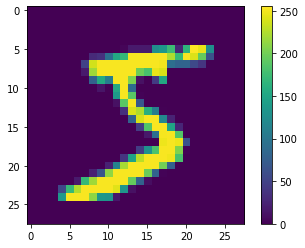

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#### 분류를 위한 DNN 모델링

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_images, y=train_labels,
                    epochs=30,
                    batch_size=128)

Epoch 1/30
469/469 [==============================] - 1s 2ms/step - loss: 5.9139 - accuracy: 0.8994
Epoch 2/30
469/469 [==============================] - 1s 2ms/step - loss: 0.7068 - accuracy: 0.9527
Epoch 3/30
469/469 [==============================] - 1s 2ms/step - loss: 0.4575 - accuracy: 0.9658
Epoch 4/30
469/469 [==============================] - 1s 3ms/step - loss: 0.3907 - accuracy: 0.9707
Epoch 5/30
469/469 [==============================] - 1s 2ms/step - loss: 0.3257 - accuracy: 0.9759
Epoch 6/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2916 - accuracy: 0.9801
Epoch 7/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2656 - accuracy: 0.9821
Epoch 8/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2335 - accuracy: 0.9837
Epoch 9/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2111 - accuracy: 0.9862
Epoch 10/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1874 - accuracy: 0.9875

#### 모델 성능 평가

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

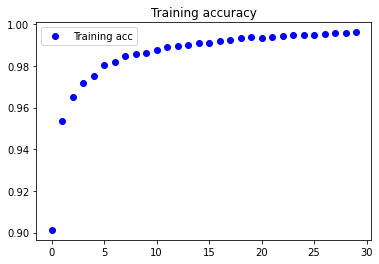

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.show()

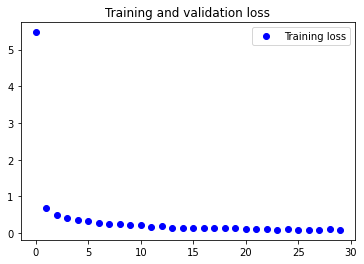

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 1.0304 - accuracy: 0.9795


#### 예측값 이미지상으로 확인

In [ ]:
import numpy as np

In [ ]:
predict = model.predict(test_images[0].reshape((1, 28, 28)))

print('predict probability:', predict)
print('predict number:', np.argmax(predict))

predict probability: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
predict number: 7


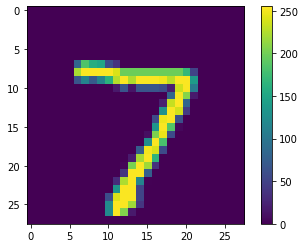

In [ ]:
plt.figure()
plt.imshow(test_images[0].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()